<a href="https://colab.research.google.com/github/Deivi-2000/fundamentos_de_ciencias_de_datos/blob/main/sp_1_david_mejia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de la fuente de datos y librerías

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Cargar tu CSV descargado
df = pd.read_csv("Gaming and Mental Health.csv")

<Figure size 1200x600 with 0 Axes>

#**1.Introducción**

**_Breve presentación del problema o pregunta de investigación._**

¿Existe una relación significativa entre los hábitos de juego y los niveles de salud mental, tales como ansiedad, depresión, estrés o bienestar general?

**_Contexto: ¿por qué es relevante este problema?_**

El uso de videojuegos se ha incrementado considerablemente en las últimas décadas, convirtiéndose en una de las principales formas de entretenimiento a nivel mundial. Este fenómeno ha generado un creciente interés por comprender cómo los hábitos de juego pueden influir en el bienestar psicológico de las personas.

La salud mental constituye un componente esencial del bienestar general, ya que influye en la calidad de vida, el desempeño académico y laboral, y las relaciones interpersonales. En este contexto, variables como la ansiedad, la depresión y el estrés han sido ampliamente estudiadas debido a su impacto en la población, especialmente en jóvenes y adultos jóvenes, quienes representan una proporción significativa de la comunidad gamer.

Diversos estudios han señalado que el uso excesivo de videojuegos podría asociarse con mayores niveles de malestar psicológico. De hecho, la Organización Mundial de la Salud incluyó en 2018 el trastorno por uso de videojuegos en la Clasificación Internacional de Enfermedades (ICD-11), reconociendo que el juego problemático puede afectar significativamente el funcionamiento diario. Sin embargo, otras investigaciones también sugieren que el uso moderado de videojuegos puede tener efectos positivos, como la reducción del estrés o la mejora del estado de ánimo.

Por ello, comprender la relación entre los hábitos de juego y la salud mental resulta relevante tanto desde una perspectiva clínica como social, ya que permite identificar posibles factores de riesgo o protección asociados a esta actividad.

**_Relación entre el problema y la base de datos seleccionada._**

Para abordar esta pregunta, se utiliza el conjunto de datos “Gaming and Mental Health” disponible en la plataforma Kaggle. Este dataset recopila información relacionada con los hábitos de juego de los participantes, incluyendo variables como frecuencia y tiempo dedicado a los videojuegos, junto con indicadores asociados a la salud mental, tales como niveles de ansiedad, depresión, estrés y bienestar general.

Gracias a la variedad de variables incluidas, es posible analizar si existe una asociación entre la intensidad o frecuencia del juego y los distintos indicadores psicológicos. Esto permite explorar la relación entre comportamiento de juego y salud mental, aportando evidencia cuantitativa para comprender mejor este fenómeno.

## <span style="color:Blue;"><strong>2. Descripción de la base de datos</strong></span>

<div style="background-color:#FCE4EC; padding:10px; border-radius:8px;">
<b>- Número de registros y variables.</b><br>
<b>- Breve descripción de las variables más importantes.</b><br>
<b>- Tipos de datos (numéricas, categóricas, fechas, texto, etc.).</b>
</div>


In [4]:
# Visualizar una pequeña muestra de los datos
df.head()

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,GD0001,17,Male,11.1,Mobile Games,Clash of Clans,PC,3.7,Very Poor,Sometimes,...,True,True,False,6.8,3.7,7,1.3,383.70,3,Severe
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
2,GD0003,23,Male,7.6,FPS,CS:GO,Multi-platform,4.4,Fair,Often,...,True,False,True,1.8,7.1,5,3.2,100.81,6,Severe
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
4,GD0005,18,Male,6.8,Battle Royale,Apex Legends,PC,3.4,Poor,Never,...,False,False,False,0.5,6.1,4,4.5,32.57,1,Moderate


In [ ]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 1000
Número de variables: 27


La base de datos seleccionada está compuesta por 1000 registros y 27 variables.


In [ ]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
object     11
float64     8
bool        5
int64       3
Name: count, dtype: int64


## Tipos de datos en la base de datos

El análisis de los tipos de datos muestra que la base de datos contiene:

- **11 variables de tipo `object`**, correspondientes principalmente a variables categóricas.
- **8 variables de tipo `float64`**, que representan variables numéricas continuas.
- **5 variables de tipo `bool`**, que indican variables binarias (verdadero/falso).
- **3 variables de tipo `int64`**, que corresponden a variables numéricas discretas.

In [ ]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- record_id
- gender
- game_genre
- primary_game
- gaming_platform
- sleep_quality
- sleep_disruption_frequency
- academic_work_performance
- mood_state
- mood_swing_frequency
- gaming_addiction_risk_level

🔸 Variables numéricas:
- age
- daily_gaming_hours
- sleep_hours
- grades_gpa
- work_productivity_score
- weight_change_kg
- exercise_hours_weekly
- social_isolation_score
- face_to_face_social_hours_weekly
- monthly_game_spending_usd
- years_gaming


Las variables categóricas describen datos generales de los jugadores y hábitos de juego, mientras que las variables numéricas permiten medir aspectos cuantitativos como edad, horas de juego, sueño, productividad e indicadores sociales.


In [ ]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
               age  daily_gaming_hours  sleep_hours  grades_gpa  \
count  1000.000000         1000.000000  1000.000000  754.000000   
mean     20.475000            6.151400     5.738100    2.518037   
std       4.116105            2.867194     1.441213    0.872312   
min      13.000000            0.500000     3.000000    1.010000   
25%      18.000000            4.100000     4.800000    1.760000   
50%      20.000000            6.000000     5.700000    2.530000   
75%      22.000000            8.025000     6.600000    3.280000   
max      35.000000           15.100000     9.000000    4.000000   

       work_productivity_score  weight_change_kg  exercise_hours_weekly  \
count               674.000000       1000.000000            1000.000000   
mean                  5.394659          1.513400               6.945900   
std                   2.898742          1.432212               1.805027   
min                   1.000000          0.000000           

Los datos muestran que la muestra está compuesta principalmente por jóvenes de al rededor de los 20 años que juegan en promedio 6 horas diarias y duermen menos de 6 horas. Algunas variables presentan valores faltantes como `grades_gpa` y ` work_productivity_score`

## <span style="color:Blue;"><strong>3. Análisis inicial de las variables</strong></span>


In [5]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
work_productivity_score    326
grades_gpa                 246
dtype: int64


Como se mencionó anteriormente, estas variables: `grades_gpa` y ` work_productivity_score`, tienen valores faltantes.

In [6]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
record_id                           1000
monthly_game_spending_usd            971
grades_gpa                           275
face_to_face_social_hours_weekly     158
daily_gaming_hours                   132
exercise_hours_weekly                 90
weight_change_kg                      70
sleep_hours                           61
primary_game                          24
age                                   23
years_gaming                          20
social_isolation_score                10
work_productivity_score               10
mood_state                             9
game_genre                             7
academic_work_performance              6
mood_swing_frequency                   5
sleep_quality                          5
sleep_disruption_frequency             5
gaming_addiction_risk_level            4
gaming_platform                        4
gender                                 3
withdrawal_symptoms                    2
eye_strain       

In [9]:
# Variables más importantes (yo hice selección manual)
variables_clave = ['age', 'daily_gaming_hours', 'years_gaming', 'gaming_addiction_risk_level', 'social_isolation_score', 'sleep_hours', 'mood_state']
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
   age  daily_gaming_hours  years_gaming gaming_addiction_risk_level  \
0   17                11.1             3                      Severe   
1   21                 3.0             1                         Low   
2   23                 7.6             6                      Severe   
3   20                 7.2             7                        High   
4   18                 6.8             1                    Moderate   

   social_isolation_score  sleep_hours mood_state  
0                       7          3.7    Anxious  
1                       2          7.2  Irritable  
2                       5          4.4  Irritable  
3                       4          5.1  Withdrawn  
4                       4          3.4      Angry  

Estadísticas descriptivas de variables clave:
               age  daily_gaming_hours  years_gaming  social_isolation_score  \
count  1000.000000         1000.000000   1000.000000             1000.000000   
mean     20.47

## <span style="color:Blue;"><strong>4. Visualizaciones exploratorias básicas</strong></span>


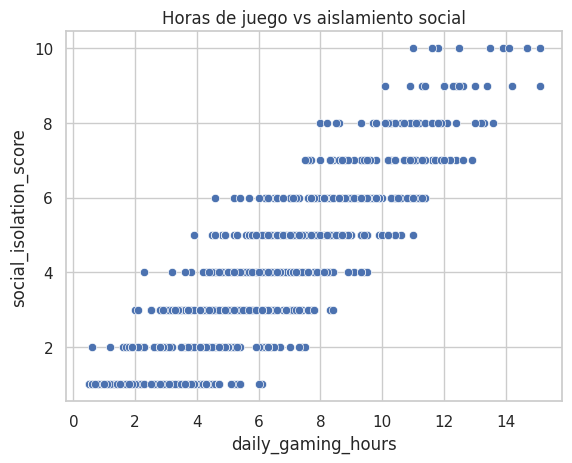

In [10]:
sns.scatterplot(x='daily_gaming_hours', y='social_isolation_score', data=df)
plt.title("Horas de juego vs aislamiento social")
plt.show()

En los niveles bajos de horas de juego (1–4 horas), predominan puntajes bajos de aislamiento (1–3). En cambio, en valores superiores a 8 horas diarias, se observa una mayor concentración de puntajes altos de aislamiento (6–10).

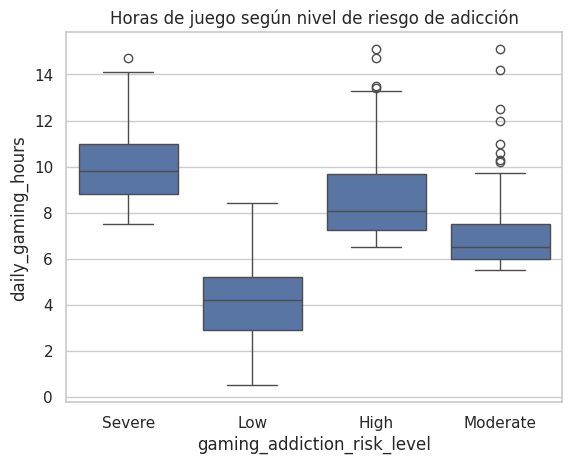

In [11]:
sns.boxplot(x='gaming_addiction_risk_level', y='daily_gaming_hours', data=df)
plt.title("Horas de juego según nivel de riesgo de adicción")
plt.show()

Se puede observar que los participantes clasificados con riesgo 'Severe' presentan la mediana más alta de horas de juego, seguidos por los niveles 'High' y 'Moderate'. En cambio, el grupo con riesgo 'Low' muestra la menor cantidad de horas diarias dedicadas a jugar videojuegos.

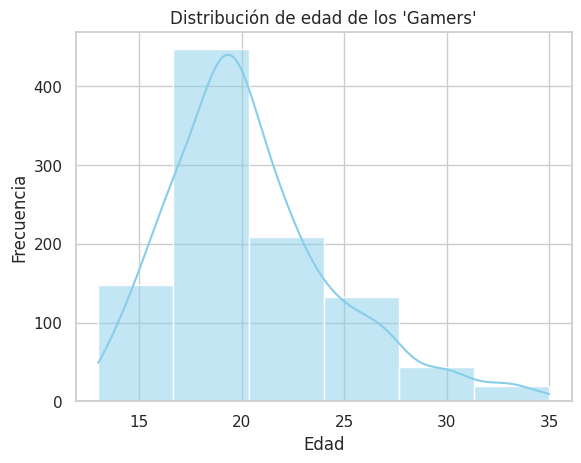

In [13]:
sns.histplot(df['age'], bins=6, kde=True, color='skyblue')
plt.title("Distribución de edad de los 'Gamers'")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

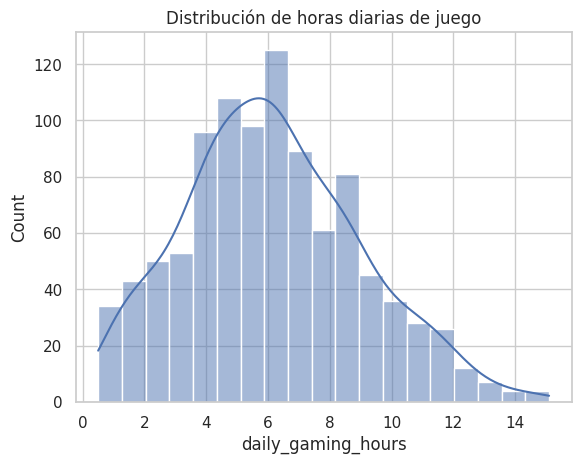

In [14]:
sns.histplot(df['daily_gaming_hours'], kde=True)
plt.title("Distribución de horas diarias de juego")
plt.show()

## <span style="color:Blue;"><strong>5. Conclusiones</strong></span>

En las visualizaciones realizadas, se evidenció una posible relación entre las horas diarias de juego y el nivel de aislamiento social, mostrando una tendencia positiva: a mayor cantidad de horas de juego, mayores puntajes de aislamiento social. De igual manera, el diagrama de cajas permitió observar que los niveles más altos de riesgo de adicción están asociados con una mayor cantidad de horas dedicadas a los videojuegos.

Este entregable contribuye al desarrollo del proyecto completo porque permitió comprender la estructura de la base de datos, identificar las variables más relevantes y detectar patrones preliminares que orientarán los análisis posteriores.

Por otro lado, estoy pendiente a la respuesta de un amigo que estudia psicología para que me oriente de mejor manera en qué variables considera más 'optimas' para escoger en este trabajo.

## <span style="color:Blue;"><strong>6. Referencias</strong></span>

- Shahid, S. (2020). Gaming and Mental Health [Data set]. Kaggle. https://www.kaggle.com/datasets/shaistashahid/gaming-and-mental-health
- Organización Mundial de la Salud. (2018, 14 de septiembre). Inclusion of gaming disorder in ICD-11. https://www.who.int/news/item/14-09-2018-inclusion-of-gaming-disorder-in-icd-11